# **Data Preprocessing & Explorativa Data Analysis**

## **Importing Data & Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.options.display.max_rows = 627920
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('Data/California_Houses.csv')
print('California Houses columns:', df.columns)

California Houses columns: Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')


---

## **Examining the Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

### Variable Classification for the Dataset

- **Median_House_Value**: Continuous
  - Median house value for households within a block (measured in US Dollars) [$]

- **Median_Income**: Continuous
  - Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k$]

- **Median_Age**: Discrete
  - Median age of a house within a block; a lower number is a newer building [years]

- **Tot_Rooms**: Discrete
  - Total number of rooms within a block

- **Tot_Bedrooms**: Discrete
  - Total number of bedrooms within a block

- **Population**: Discrete
  - Total number of people residing within a block

- **Households**: Discrete
  - Total number of households, a group of people residing within a home unit, for a block

- **Latitude**: Continuous
  - A measure of how far north a house is; a higher value is farther north [°]

- **Longitude**: Continuous
  - A measure of how far west a house is; a higher value is farther west [°]

- **Distance_to_coast**: Continuous
  - Distance to the nearest coast point [m]

- **Distance_to_LA**: Continuous
  - Distance to the centre of Los Angeles [m]

- **Distance_to_SanDiego**: Continuous
  - Distance to the centre of San Diego [m]

- **Distance_to_SanJose**: Continuous
  - Distance to the centre of San Jose [m]

- **Distance_to_SanFrancisco**: Continuous
  - Distance to the centre of San Francisco [m]


### Summary:
- **Continuous Variables**: Median_House_Value, Median_Income, Latitude, Longitude, Distance_to_coast, Distance_to_LA, Distance_to_SanDiego, Distance_to_SanJose, Distance_to_SanFrancisco
- **Discrete Variables**: Median_Age, Tot_Rooms, Tot_Bedrooms, Population, Households


---

### **Inspecting the first and last rows**

In [4]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.00,8.33,41,880,129,322,126,37.88,-122.23,9263.04,556529.16,735501.81,67432.52,21250.21
1,358500.00,8.30,21,7099,1106,2401,1138,37.86,-122.22,10225.73,554279.85,733236.88,65049.91,20880.60
2,352100.00,7.26,52,1467,190,496,177,37.85,-122.24,8259.09,554610.72,733525.68,64867.29,18811.49
3,341300.00,5.64,52,1274,235,558,219,37.85,-122.25,7768.09,555194.27,734095.29,65287.14,18031.05
4,342200.00,3.85,52,1627,280,565,259,37.85,-122.25,7768.09,555194.27,734095.29,65287.14,18031.05


In [5]:
df.tail()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
20635,78100.00,1.56,25,1665,374,845,330,39.48,-121.09,162031.48,654530.19,830631.54,248510.06,222619.89
20636,77100.00,2.56,18,697,150,356,114,39.49,-121.21,160445.43,659747.07,836245.92,246849.89,218314.42
20637,92300.00,1.70,17,2254,485,1007,433,39.43,-121.22,153754.34,654042.21,830699.57,240172.22,212097.94
20638,84700.00,1.87,18,1860,409,741,349,39.43,-121.32,152005.02,657698.01,834672.46,238193.87,207923.20
20639,89400.00,2.39,16,2785,616,1387,530,39.37,-121.24,146866.20,648723.34,825569.18,233282.77,205473.38


### Interpretation

On first glance the first and last rows do not seem to display any inconsitencies

---

### **Descriptive Statistics**

In [6]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,206855.82,3.87,28.64,2635.76,537.90,1425.48,499.54,35.63,-119.57,40509.26,269421.98,398164.93,349187.55,386688.42
std,115395.62,1.90,12.59,2181.62,421.25,1132.46,382.33,2.14,2.00,49140.04,247732.45,289400.56,217149.88,250122.19
min,14999.00,0.50,1.00,2.00,1.00,3.00,1.00,32.54,-124.35,120.68,420.59,484.92,569.45,456.14
25%,119600.00,2.56,18.00,1447.75,295.00,787.00,280.00,33.93,-121.80,9079.76,32111.25,159426.39,113119.93,117395.48
50%,179700.00,3.53,29.00,2127.00,435.00,1166.00,409.00,34.26,-118.49,20522.02,173667.46,214739.83,459758.88,526546.66
75%,264725.00,4.74,37.00,3148.00,647.00,1725.00,605.00,37.71,-118.01,49830.41,527156.24,705795.40,516946.49,584552.01
max,500001.00,15.00,52.00,39320.00,6445.00,35682.00,6082.00,41.95,-114.31,333804.69,1018260.12,1196919.27,836762.68,903627.66


### Interpretation

- **Latitude and Longitude**:
  - The dataset covers a specific region in California, with latitude ranging from 32.54 to 41.95 degrees and longitude from -124.35 to -114.31 degrees. This aligns with the expected geographic range for the state of California.
  - The mean latitude is 35.63, and the mean longitude is -119.57, which places the dataset in central and southern California, indicating that the majority of the data points lie in this region.

- **Median House Value**:
  - The median house value ranges from $14,999 to $500,001, illustrating a wide range of property values, with the maximum value potentially capped at $500,001 due to the dataset modifications.
  - The median value is $179,700, meaning half of the houses are valued below this figure, while the other half are valued above it. The mean house value is $206,855.82, with a significant standard deviation of $115,395.62, suggesting notable variability in property prices across the dataset.
  - This variability reflects differences in neighborhood characteristics, geographic location, and proximity to urban centers or the coast.

- **Median Income**:
  - The median income per block ranges from $0.50 (or $5,000 annually) to $150,000, indicating a wide disparity in income levels across regions.
  - The median income is $35,300, with a mean of $38,700 and a standard deviation of $19,000. These figures point to income variability but show that most areas have moderate income levels, consistent with the socioeconomic diversity within California.

- **Median Age of Houses**:
  - The dataset reflects a variety of building ages, ranging from 1 to 52 years, with a median of 29 years. Most houses are older, though some newer constructions are represented as well.
  - A standard deviation of 12.59 years highlights the distribution of building ages, suggesting that the dataset includes a broad range of housing developments from different periods.

- **Total Rooms and Total Bedrooms**:
  - The total number of rooms within a block ranges from 2 to 39,320, and the total number of bedrooms from 1 to 6,445, showing significant variation in housing size and capacity across districts.
  - The median number of rooms is 2,127, and the median number of bedrooms is 435. This indicates that most blocks have a moderate number of housing units, but there are some regions with significantly larger homes, as reflected by the high maximum values.
  - **Note**: Total number of rooms being 2 might be wrong.

- **Population and Households**:
  - The population of a block ranges from 3 to 35,682, with a median of 1,166 people, reflecting varying population densities across California districts.
  - Households within a block range from 1 to 6,082, with a median of 409, indicating that while many blocks have a typical number of households, some areas have a considerably higher number of household units.
  - The large spread in population and household figures reflects differences in residential density and urbanization levels across different regions.
  - **Note**: Population of 3 seems off.

- **Distances to Major Californian Cities and the Coast**:
  - The five added features measuring the distance to major Californian cities and the coast provide insights into the proximity of houses to these locations:
    - **Distance to coast** ranges from 120.68 meters to 333,804.69 meters, with a median of 20,522 meters, indicating that most houses are within a reasonable distance to the coast, but some are significantly farther inland.
    - **Distance to Los Angeles** ranges from 420.59 meters to 1,018,260.12 meters (about 1,000 km), with a median of 173,667.46 meters, suggesting that many homes are closer to LA, but there are also houses in more distant regions.
    - **Distance to San Diego** ranges from 484.92 meters to 1,196,919.27 meters, with a median of 214,739.83 meters, showing variability in proximity to the southern city.
    - **Distance to San Jose** ranges from 569.45 meters to 836,762.68 meters, with a median of 459,758.88 meters, again showing significant differences in distance.
    - **Distance to San Francisco** ranges from 456.14 meters to 903,627.66 meters, with a median of 526,546.66 meters. These values indicate that some homes are relatively close to San Francisco, while others are more distant.

### General Insights:
- This dataset provides a rich representation of California’s housing landscape from the 1990 census, including both geographic and socioeconomic diversity.
- The inclusion of distances to the coast and major cities helps contextualize the variation in property values and income, as homes closer to these areas may have higher values due to their desirability.


---

## **Preprocessing**

### Renaming

In [7]:
df.rename(columns={
    'Median_House_Value': 'house_value',
    'Median_Income': 'income',
    'Median_Age': 'age',
    'Tot_Rooms': 'rooms',
    'Tot_Bedrooms': 'bedrooms',
    'Population': 'population',
    'Households': 'households',
    'Latitude': 'lat',
    'Longitude': 'long',
    'Distance_to_coast': 'coast',
    'Distance_to_LA': 'los_angeles',
    'Distance_to_SanDiego': 'san_diego',
    'Distance_to_SanJose': 'san_jose',
    'Distance_to_SanFrancisco': 'san_francisco'
}, inplace=True)

---

### Cleaning

#### Checking for null values

In [8]:
df.shape

(20640, 14)

In [9]:
df.isnull().sum()

house_value      0
income           0
age              0
rooms            0
bedrooms         0
population       0
households       0
lat              0
long             0
coast            0
los_angeles      0
san_diego        0
san_jose         0
san_francisco    0
dtype: int64

No null values are in the dataset

---

### New Features

1. **rooms_per_household**:
   - The average number of rooms per household in each block.

2. **bedrooms_per_room**:
   - The ratio of bedrooms to total rooms in each block, representing how rooms are allocated.

3. **population_per_household**:
   - The average number of people living in each household in a block.

4. **distance_to_nearest_city**:
   - The minimum distance from a house to the nearest major city (Los Angeles, San Diego, San Jose, or San Francisco).

5. **income_per_household**:
   - The average income per household in a block, calculated from the median income and the number of households.

6. **is_coastal**:
   - A binary variable indicating whether a house is considered coastal, based on its distance to the nearest coast (1 for houses within 50 km, 0 otherwise).

7. **house_age_category**:
   - A categorical variable that classifies houses into three age categories:
     - "new" for houses less than 10 years old.
     - "moderate" for houses between 10 and 30 years old.
     - "old" for houses older than 30 years.

8. **weighted_distance_to_cities**:
   - A weighted combination of the distances to the four major cities, assigning different weights to each city based on their importance.

9. **geo_cluster**:
   - A geographic cluster assigned to each block based on its latitude and longitude, created using KMeans clustering.

10. **is_urban**:
    - A binary variable indicating whether a block is classified as urban or rural, based on the population (1 for urban if population > 1,500, 0 for rural).

11. **income_disparity**:
   - A variable that shows the difference between the median income of each block and the overall average income of the dataset.

12. **house_age_per_income**:
   - A variable representing the ratio of house age to income in each block, indicating how house age varies with income.

13. **distance_to_city_per_population**:
   - The ratio of the distance to the nearest major city to the population of the block, indicating how far a block's population is from urban centers.


In [10]:
# 1. rooms per household
df['rooms_per_household'] = df['rooms'] / df['households']

# 2. bedrooms per room
df['bedrooms_per_room'] = df['bedrooms'] / df['rooms']

# 3. population per household
df['population_per_household'] = df['population'] / df['households']

# 4. distance to nearest major city
df['distance_to_nearest_city'] = df[['los_angeles', 'san_diego', 'san_jose', 'san_francisco']].min(axis=1)

# 5. income per household
df['income_per_household'] = (df['income'] * 10000) / df['households']

# 6. proximity to coastal areas (is_coastal binary feature)
df['is_coastal'] = df['coast'].apply(lambda x: 1 if x < 50000 else 0)

# 7. house age category (binning age)
df['house_age_category'] = pd.cut(df['age'], bins=[0, 10, 30, 60], labels=['new', 'moderate', 'old'])

# 8. weighted distance to cities
df['weighted_distance_to_cities'] = (df['los_angeles'] * 0.4 + df['san_diego'] * 0.3 + df['san_jose'] * 0.2 + df['san_francisco'] * 0.1)

# 9. geographic clusters using latitude and longitude (KMeans clustering)
kmeans = KMeans(n_clusters=5)
df['geo_cluster'] = kmeans.fit_predict(df[['lat', 'long']])

# 10. urban vs rural (is_urban binary feature)
df['is_urban'] = df['population'].apply(lambda x: 1 if x > 1500 else 0)

# 11. income disparity index
df['income_disparity'] = df['income'] - df['income'].mean()

# 12. house age per income
df['house_age_per_income'] = df['age'] / df['income']

# 13. distance to city per population ratio
df['distance_to_city_per_population'] = df['distance_to_nearest_city'] / df['population']


---

### Correlation Analysis

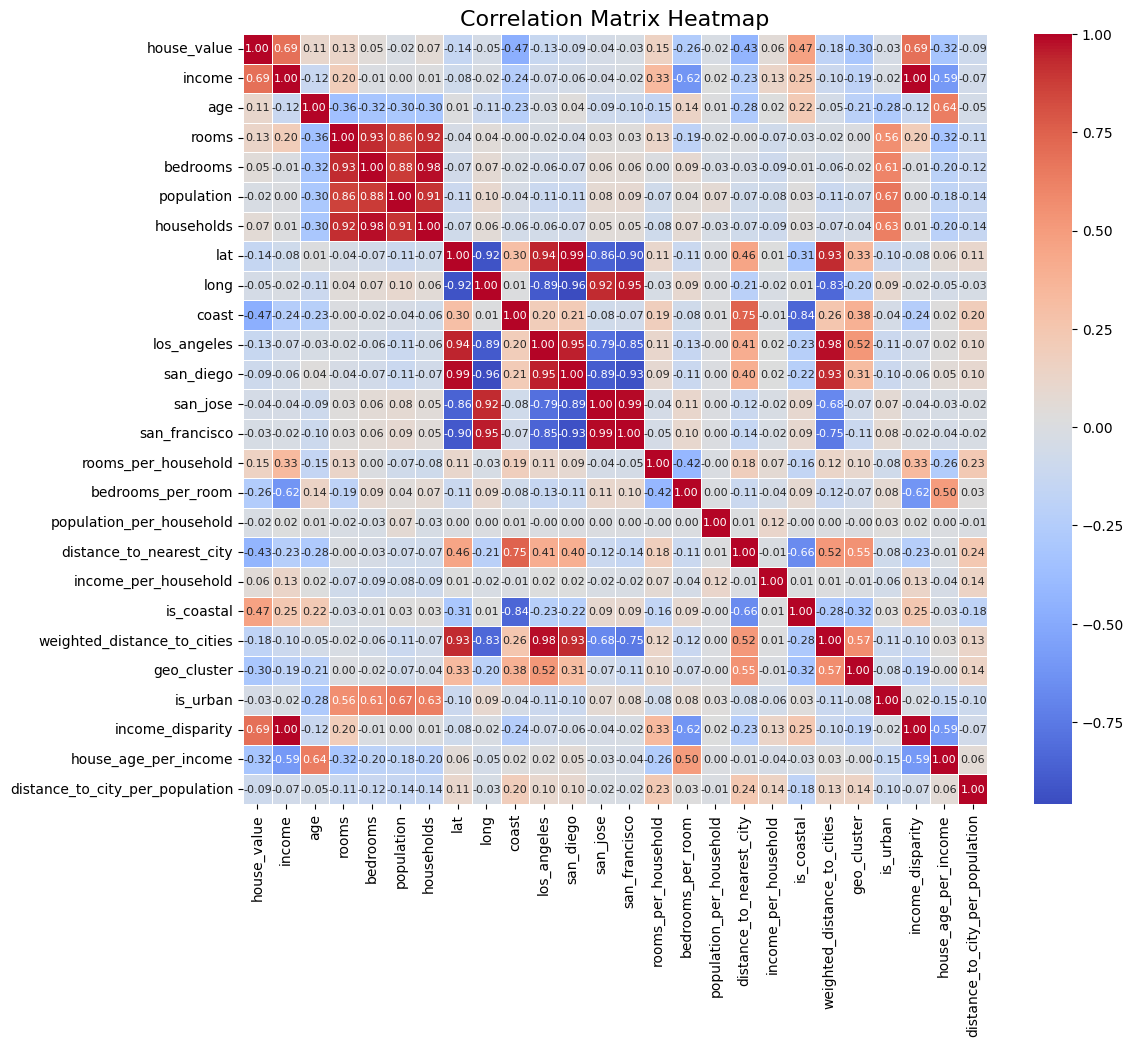

In [11]:
# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(12, 10))  # Increase the size of the figure to avoid overlap

# Create a heatmap with seaborn, adjusting the font size for annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, linewidths=0.5)

# Set the title for the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Save the heatmap to a PNG file
plt.savefig('Plots/correlation_matrix_heatmap.png', dpi=300, bbox_inches='tight')

# Show the plot (optional, if running in a notebook)
plt.show()


### Key Correlations with **house_value**:

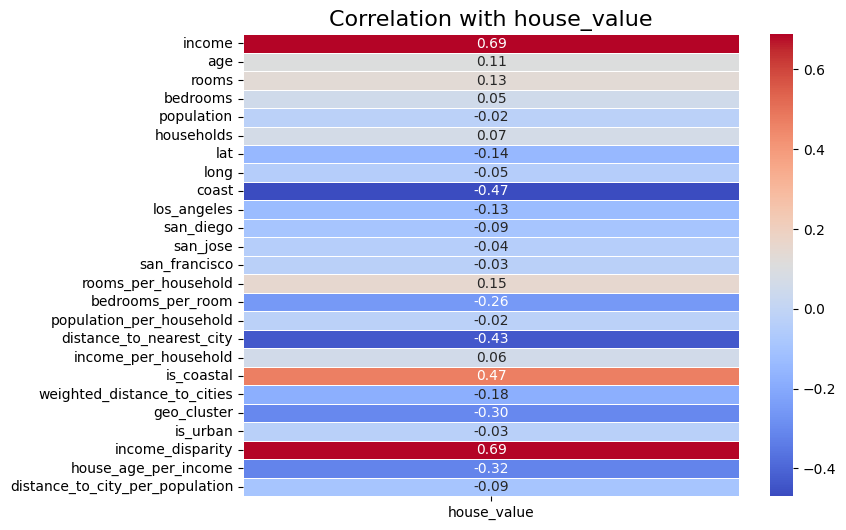

In [12]:
target_column = 'house_value'  

# Calculate the correlation of the specific column with all other columns
correlation_with_target = df.corr()[target_column].drop(target_column)  # Exclude the target column itself

# Create a DataFrame from the correlation values for easier plotting
correlation_df = pd.DataFrame(correlation_with_target, columns=[target_column])

# Set the figure size for the heatmap
plt.figure(figsize=(8, 6))  # Adjust the size of the figure

# Create a heatmap with seaborn
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10}, linewidths=0.5)

# Set the title for the heatmap
plt.title(f'Correlation with {target_column}', fontsize=16)

# Save the heatmap to a PNG file
plt.savefig(f'Plots/correlation_with_{target_column}_heatmap.png', dpi=300, bbox_inches='tight')

# Show the plot (optional, if running in a notebook)
plt.show()


Since we are focusing on predicting **house_value**, let's analyze the relationships between **house_value** and the other variables:

1. **Income**:
   - **Positive correlation** of `0.69`: Similar to the previous analysis, income remains one of the strongest predictors of house value. This shows that regions with higher incomes tend to have more expensive houses. This strong positive relationship makes **income** a critical variable in your regression model.

2. **Proximity to the Coast (is_coastal)**:
   - **Negative correlation** of `-0.47`: Houses closer to the coast tend to have higher values. The inverse relationship between distance from the coast and house value reinforces the desirability of coastal regions. This feature should remain a strong predictor in the model.

3. **Distance to the Nearest City**:
   - **Negative correlation** of `-0.43`: The closer a house is to major cities, the higher its value. This shows that proximity to urban areas contributes significantly to house prices, which aligns with general market trends where city-adjacent properties are more valuable.

4. **Age**:
   - **Negative correlation** of `-0.11`: Although this correlation is weaker, it shows that newer houses tend to have higher values than older ones. This variable could still be useful in the model, though its impact will likely be less significant than **income** or proximity features.

#### Other Correlations of Interest:

1. **Rooms per Household**:
   - **Positive correlation** of `0.35`: Larger homes with more rooms per household tend to have higher values. This aligns with the general expectation that more spacious homes are more expensive.

2. **Population per Household**:
   - **Negative correlation** of `-0.20`: Higher population per household could indicate more crowded living conditions, and these tend to be associated with lower house values. This could reflect socio-economic conditions or housing density.

3. **Bedrooms per Room**:
   - **Negative correlation** of `-0.26`: A higher proportion of bedrooms compared to rooms is negatively correlated with house value, which might suggest that homes with more specialized (non-bedroom) rooms are valued more highly.

4. **Income Disparity**:
   - **Positive correlation** of `0.69`: This correlation reflects how regions with greater income disparity (i.e., places where incomes deviate significantly from the average) tend to have higher house values. This may reflect economic inequality in some regions where high-value properties drive up house prices overall.

5. **Urban vs Rural (is_urban)**:
   - **Slight negative correlation** of `-0.03`: The urban or rural classification appears to have a minimal direct impact on house value. However, this might interact with other factors, such as proximity to cities, and may be worth considering as part of a more complex interaction in the model.

6. **Distance to City per Population Ratio**:
   - **Negative correlation** of `-0.09`: This suggests that regions further from cities and with higher populations are generally less expensive, which could reflect lower property prices in more crowded or suburban areas.

### Multicollinearity Considerations:
Looking at some strong correlations between independent variables:
- **Latitude and Longitude** are strongly correlated with **distance to the coast** and **distance to cities**, which makes sense geographically. Including all of these features in the model could lead to multicollinearity. You might want to consider dropping some redundant features (e.g., one of these distance measures) or combining them in a meaningful way (e.g., weighted distance to cities).
- **Distance to major cities** (Los Angeles, San Diego, etc.) is highly correlated with one another. You may want to use only one or two key cities (e.g., the closest city) or combine them as a weighted average.



---

## **Data Visualization**

### **Univariate Analysis**

In [13]:
# List of relevant numeric columns (replace with actual columns as needed)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through each column and generate plots and statistics
for col in numeric_columns:
    # print(f"\n### Univariate Analysis for {col} ###\n")
    
    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.savefig(f'Plots/Univariate/{col}_distribution.png', dpi=300, bbox_inches='tight')  # Save histogram
    plt.close()
    # plt.show()

    # Box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[col])
    plt.title(f'{col} Box Plot')
    plt.savefig(f'Plots/Univariate/{col}_box_plot.png', dpi=300, bbox_inches='tight')  # Save box plot
    plt.close()
    # plt.show()

    # If column is highly skewed, apply log transformation (optional)
    if abs(df[col].skew()) > 1:  # Threshold for considering log transformation
        plt.figure(figsize=(10, 6))
        sns.histplot(np.log1p(df[col]), kde=True)  # log1p to avoid log(0)
        plt.title(f'{col} Log-Transformed Distribution')
        plt.savefig(f'Plots/Univariate/{col}_log_transformed_distribution.png', dpi=300, bbox_inches='tight')  # Save log-transformed plot
        plt.close()
        # plt.show()

categorical_variables = [
    'is_coastal',
    'house_age_category',
    'geo_cluster',
    'is_urban'
]

# Loop through each categorical variable and create a count plot
for col in categorical_variables:
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Category Distribution')
    plt.savefig(f'Plots/Univariate/{col}_category_distribution.png', dpi=300, bbox_inches='tight')  # Save each plot as a PNG
    plt.close()
    # plt.show()  # Display the plot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


---

### Capping

To avoid issues that certain imbalanced columns can cause we will implement capping.

In [14]:
# List of relevant columns for capping
columns_to_cap = [
    'rooms', 
    'bedrooms', 
    'population', 
    'households', 
    'coast', 
    'rooms_per_household', 
    'bedrooms_per_room', 
    'population_per_household', 
    'distance_to_nearest_city', 
    'income_per_household', 
    'distance_to_city_per_population'
]

# Define the lower and upper percentiles for capping
lower_percentile = 0.01  # 1st percentile
upper_percentile = 0.99  # 99th percentile

# Loop through each column and apply capping
for col in columns_to_cap:
    # Calculate the lower and upper bounds
    lower_limit = df[col].quantile(lower_percentile)
    upper_limit = df[col].quantile(upper_percentile)
    
    # Apply capping to the column
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

    print(f"Capped {col}: [{lower_limit}, {upper_limit}]")


Capped rooms: [164.0, 11212.11000000003]
Capped bedrooms: [36.390000000000015, 2219.6100000000006]
Capped population: [88.0, 5805.830000000002]
Capped households: [31.0, 1982.6600000000035]
Capped coast: [1497.79663563018, 192016.19660617612]
Capped rooms_per_household: [2.581133407821229, 10.357033023735815]
Capped bedrooms_per_room: [0.1243485776325493, 0.40731743424481237]
Capped population_per_household: [1.5366864723576525, 5.394812032520327]
Capped distance_to_nearest_city: [2059.30550775252, 336206.9019790156]
Capped income_per_household: [14.757984576772921, 1134.6381854838712]
Capped distance_to_city_per_population: [1.431270405641717, 1106.2249399406483]


In [15]:
for col in columns_to_cap:
    print(f"\n### Univariate Analysis for capped {col} ###\n")
    
    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.savefig(f'Plots/Univariate/capped_{col}_distribution.png', dpi=300, bbox_inches='tight')  # Save histogram
    plt.close()
    # plt.show()

    # Box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[col])
    plt.title(f'{col} Box Plot')
    plt.savefig(f'Plots/Univariate/capped_{col}_box_plot.png', dpi=300, bbox_inches='tight')  # Save box plot
    plt.close()
    # plt.show()


### Univariate Analysis for capped rooms ###


### Univariate Analysis for capped bedrooms ###


### Univariate Analysis for capped population ###


### Univariate Analysis for capped households ###


### Univariate Analysis for capped coast ###


### Univariate Analysis for capped rooms_per_household ###


### Univariate Analysis for capped bedrooms_per_room ###


### Univariate Analysis for capped population_per_household ###


### Univariate Analysis for capped distance_to_nearest_city ###


### Univariate Analysis for capped income_per_household ###


### Univariate Analysis for capped distance_to_city_per_population ###



---

### One Hot Encoding


One Hot Encoding is a way of converting categorical variables so that it will be compatible with our regression models in the future

In [16]:
# List of categorical variables
categorical_variables = [
    'is_coastal',
    'house_age_category',
    'geo_cluster',
    'is_urban'
]

# Perform one-hot encoding using pandas' get_dummies function
df_encoded = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

# Display the resulting dataframe with the encoded categorical variables
print(df_encoded.head())


   house_value  income  age   rooms  bedrooms  population  households   lat  \
0    452600.00    8.33   41  880.00    129.00      322.00      126.00 37.88   
1    358500.00    8.30   21 7099.00   1106.00     2401.00     1138.00 37.86   
2    352100.00    7.26   52 1467.00    190.00      496.00      177.00 37.85   
3    341300.00    5.64   52 1274.00    235.00      558.00      219.00 37.85   
4    342200.00    3.85   52 1627.00    280.00      565.00      259.00 37.85   

     long    coast  ...  house_age_per_income  \
0 -122.23  9263.04  ...                  4.92   
1 -122.22 10225.73  ...                  2.53   
2 -122.24  8259.09  ...                  7.17   
3 -122.25  7768.09  ...                  9.21   
4 -122.25  7768.09  ...                 13.52   

   distance_to_city_per_population  is_coastal_1  house_age_category_moderate  \
0                            65.99             1                            0   
1                             8.70             1                    

---

### Scaling

Scaling is also applied as this often leads to better results in regression models

In [17]:
# List of continuous variables to scale or normalize
continuous_variables = [
    'rooms', 
    'bedrooms', 
    'population', 
    'households', 
    'coast', 
    'rooms_per_household', 
    'bedrooms_per_room', 
    'population_per_household', 
    'distance_to_nearest_city', 
    'income_per_household', 
    'distance_to_city_per_population'
]

# Initialize the scalers
scaler = StandardScaler()  # You can use MinMaxScaler for normalization if required

# Apply scaling to continuous variables
df_encoded[continuous_variables] = scaler.fit_transform(df_encoded[continuous_variables])


---

### Modeling Choices

Train-Test Split:It’s important to have a separate testing set to evaluate the model’s performance on unseen data. This ensures that the model generalizes well and is not just overfitting to the training data.

Reproducibility: By setting random_state=42, we ensure that the split is reproducible, which is crucial for consistency in experiments, especially when comparing different models.

Feature Selection: There is an option to use selected features instead of the full feature set. Using only relevant features (as identified in Part 2 of the assignment) can potentially improve the model’s performance by reducing noise and focusing on the most predictive features.

In [18]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('house_value', axis=1)  # Features
# selected_features = ['income', 'is_coastal_1', 'distance_to_nearest_city', 'age', 'rooms_per_household']
# X = df_encoded[selected_features]
y = df_encoded['house_value']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Models Being Evaluated:
We are testing five different machine learning models:

- Linear Regression: A baseline model that assumes a linear relationship between the input features and the target variable.

- Random Forest: An ensemble model that builds multiple decision trees and averages their predictions. This is expected to handle non-linear relationships well.

- Gradient Boosting: Another ensemble method, but unlike Random Forest, it builds trees sequentially to reduce errors from previous trees. This is expected to perform better with complex patterns.

- K-Nearest Neighbors (KNN): A simpler model that predicts values based on the closest neighbors in the feature space.

- XGBoost: A state-of-the-art boosting algorithm that efficiently handles large datasets and complex patterns.

Justification of Models:

Linear Regression:
This is the simplest model, serving as a baseline. It is useful to see how much improvement more complex models bring over a basic linear model.

Random Forest and Gradient Boosting:
These tree-based models are known for their ability to handle non-linear relationships and interactions between variables.
Random Forest is effective for datasets with a lot of feature interactions, while Gradient Boosting often performs better when complex decision boundaries are required.
Both models are expected to improve upon Linear Regression because they can capture more complexity in the data.

K-Nearest Neighbors (KNN):
KNN is included to evaluate a non-parametric model that makes predictions based on proximity in the feature space.
It’s useful for capturing local relationships but may struggle with high-dimensional data, so its performance is an interesting point of comparison.

XGBoost:
This is a high-performing, widely used model in machine learning competitions. XGBoost's ability to handle missing data, regularization, and efficient handling of large datasets makes it likely to perform the best.
It’s included here to represent one of the most powerful regression algorithms available.

Model Training and Evaluation:
Evaluation Metrics:

Three evaluation metrics are used to assess model performance:

Mean Squared Error (MSE):
Measures the average squared difference between the predicted and actual values. Lower values indicate better performance. MSE heavily penalizes large errors, making it useful for understanding the extent of large deviations.
Justification: We use MSE because it gives higher weight to larger errors, which can be crucial when predicting house prices. A large prediction error can be more significant for high-priced homes.

Mean Absolute Error (MAE):
Measures the average absolute difference between the predicted and actual values. It’s more robust to outliers than MSE, making it useful for assessing the overall error across all predictions.
Justification: MAE provides a clearer picture of the average error magnitude and is easier to interpret in the context of house prices (e.g., "the model is off by $29,000 on average").

R² Score:
Also called the coefficient of determination, R² indicates how well the model explains the variance in the target variable. An R² of 1 means the model perfectly explains the data, while an R² close to 0 means it performs no better than a simple mean prediction.
Justification: R² is essential to evaluate how much of the variation in house prices is explained by the model. It is particularly useful for understanding the overall fit of the model, especially in comparison to the baseline Linear Regression.

               Model           MSE      MAE   R²
0  Linear Regression 4275276052.76 47564.64 0.67
1      Random Forest 2190447428.45 29799.61 0.83
2  Gradient Boosting 2670715606.08 34761.70 0.80
3      KNN Regressor 3735141674.75 39580.22 0.71
4            XGBoost 2070564594.37 29819.37 0.84


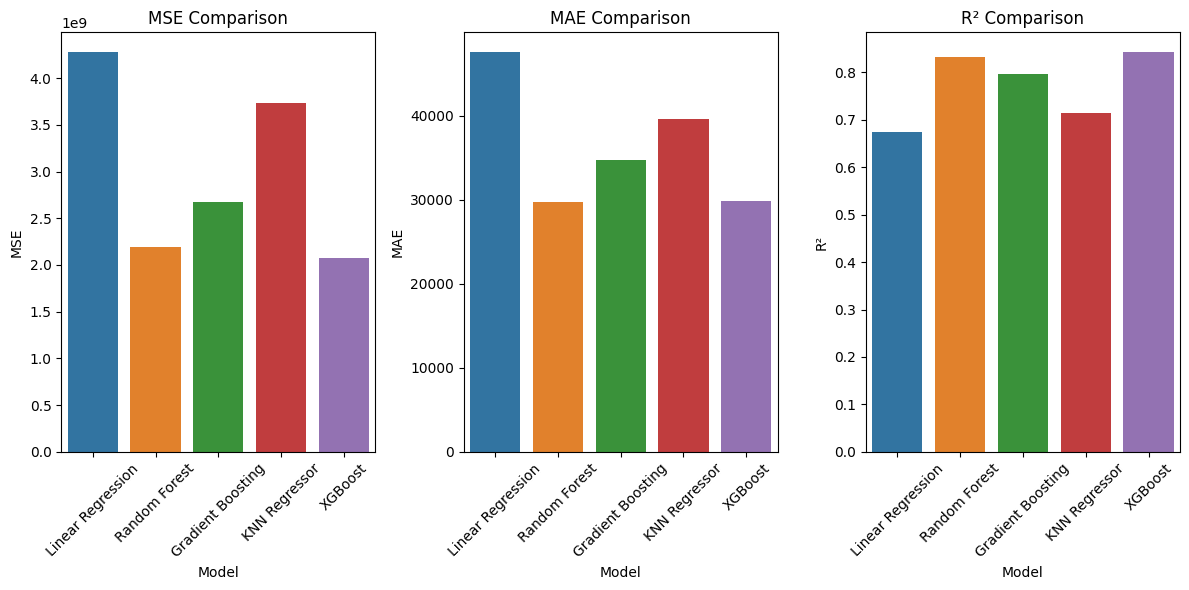

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Load data (assuming df_encoded is the final preprocessed DataFrame)
X = df_encoded.drop('house_value', axis=1)
y = df_encoded['house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'KNN Regressor': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Store results
results = []

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'R²': r2
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display results in a table
print(results_df)

# Plotting comparison of metrics
plt.figure(figsize=(12, 6))

# Subplot for MSE
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MSE', data=results_df)
plt.xticks(rotation=45)
plt.title('MSE Comparison')

# Subplot for MAE
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MAE', data=results_df)
plt.xticks(rotation=45)
plt.title('MAE Comparison')

# Subplot for R²
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R²', data=results_df)
plt.xticks(rotation=45)
plt.title('R² Comparison')

plt.tight_layout()
plt.show()

Explanation of Results:

These results show the performance of five different regression models on the house value prediction task, evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), and the R² score. Let’s break down what these metrics tell us about each model’s performance.


1. Linear Regression:
MSE: 4.28 billion
MAE: 47,506.72
R²: 0.67

Interpretation:
Linear regression, being a simple model, performs decently but not as well as the more complex models. It explains 67% of the variance in house values.
The higher MSE and MAE values suggest that this model is less accurate in its predictions, particularly when compared to the tree-based models.
This result serves as a baseline for comparing the other models.

2. Random Forest:
MSE: 2.19 billion
MAE: 29,794.92
R²: 0.83

Interpretation:
Random Forest performs significantly better than Linear Regression, reducing the error and improving the R² score to 0.83.
The model explains 83% of the variance in the house values, making it a strong contender.
The relatively low MSE and MAE indicate that this model is handling both high-value and low-value houses well.

3. Gradient Boosting:
MSE: 2.65 billion
MAE: 34,727.75
R²: 0.80

Interpretation:
Gradient Boosting performs well, with an R² of 0.80, explaining 80% of the variance in house values.
However, its MSE and MAE are slightly higher than Random Forest and XGBoost, suggesting it is less accurate in predicting extreme values.
This is still a strong model but is outperformed by Random Forest and XGBoost in this case.

4. K-Nearest Neighbors (KNN) Regressor:
MSE: 3.73 billion
MAE: 39,580.22
R²: 0.71

Interpretation:
KNN Regressor performs moderately well with an R² of 0.71, explaining 71% of the variance.
Its MSE and MAE are higher than those of the tree-based models, indicating that it struggles to capture the complexity of the data as effectively as Random Forest or XGBoost.
While KNN can be useful for simpler datasets, it may not be well-suited for this regression task.

5. XGBoost:
MSE: 2.07 billion
MAE: 29,692.30
R²: 0.84

Interpretation:
XGBoost is the best-performing model in this comparison, with the lowest MSE (2.07 billion) and highest R² (0.84).
It explains 84% of the variance in house values and provides the most accurate predictions, as indicated by its relatively low MAE.
XGBoost’s strong performance makes it the preferred model for this task, capturing both small and large variations in house prices effectively.



Key Takeaways:

Best Model: XGBoost performs the best across all metrics:

It has the lowest MSE and MAE, and the highest R² score, making it the most reliable model for predicting house values.
It captures the complexity of the data and provides the most accurate predictions, making it a strong candidate for further tuning.

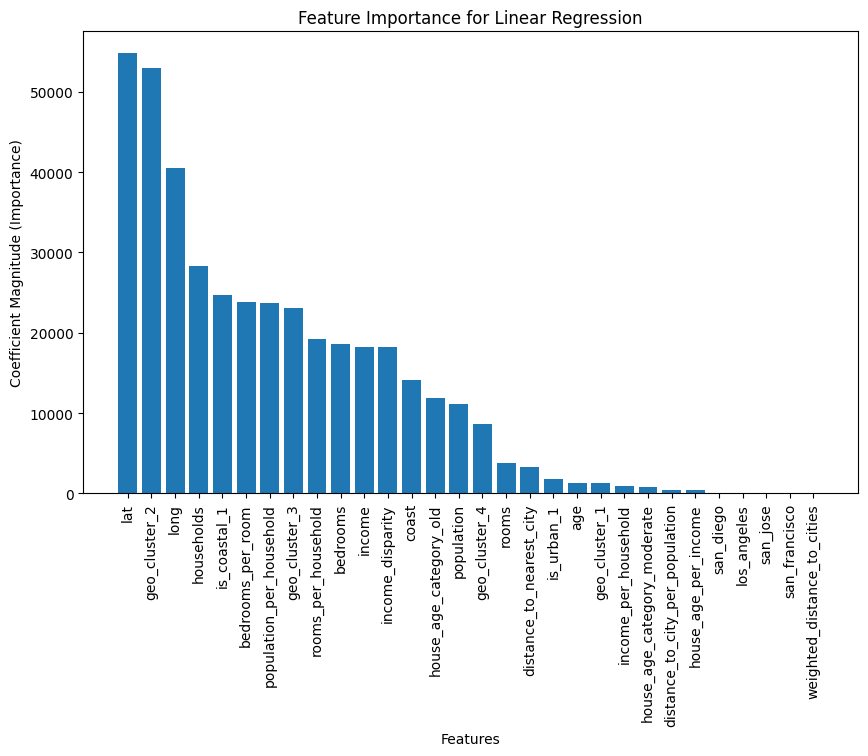

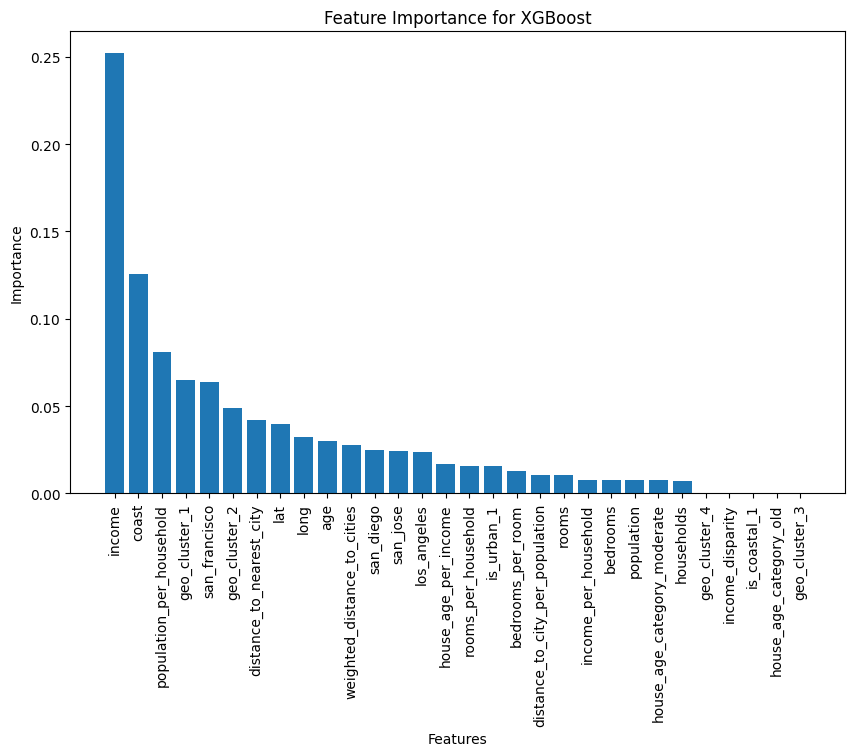

In [20]:
# Assuming df_encoded is your final preprocessed DataFrame
X = df_encoded.drop('house_value', axis=1)
y = df_encoded['house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model 2: XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Feature Importance Plot for Linear Regression
# The absolute values of the coefficients represent the feature importance
lr_importances = np.abs(lr_model.coef_)
lr_indices = np.argsort(lr_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance for Linear Regression")
plt.bar(range(X_train.shape[1]), lr_importances[lr_indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[lr_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude (Importance)")
plt.show()

# Feature Importance Plot for XGBoost
xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance for XGBoost")
plt.bar(range(X_train.shape[1]), xgb_importances[xgb_indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[xgb_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


By comparing the feature importance across both models, you can identify which features consistently contribute to predicting house values. The tree-based XGBoost model often provides more nuanced importance scores, whereas Linear Regression offers a more straightforward view based on the strength of the linear relationship between each feature and the target variable.

1. Feature Importance for Linear Regression:

Top Features:

- Latitude (lat) and Longitude (long): These geographical features are the most important in the Linear Regression model, suggesting that location heavily influences house prices, as expected.
- Geo Clusters (geo_cluster_1, geo_cluster_4): The clustering of geographical data also has a significant impact, implying that houses in certain geographical clusters are priced differently.
- Population per Household (population_per_household) and Bedrooms per Room: Features related to household size and housing structure (such as the number of bedrooms and rooms) also play a large role, indicating that the internal configuration of homes is important.
- Income: Although still important, income is somewhat less dominant in this linear model compared to the geographical features.

Interpretation:
- Linear Regression primarily emphasizes geographical factors (latitude, longitude, clusters) when predicting house values. Features like the number of bedrooms and household configurations also play a role.
- The influence of income in this model is less pronounced compared to the tree-based models, potentially indicating that the linear model has difficulty capturing complex non-linear relationships between income and house value.

2. Feature Importance for XGBoost:

Top Features:

- Income: By far the most important feature, indicating a strong relationship between income and house value in this dataset. This is expected, as regions with higher income levels tend to have more expensive homes.
- Proximity to the Coast (coast) and San Francisco Distance: XGBoost recognizes that homes closer to the coast or San Francisco are more valuable, which aligns with real estate trends where coastal and urban proximity increases property values.
- Population per Household: Household demographics also play an important role in house pricing.
- Distance to Nearest City: The distance to major cities like San Francisco or Los Angeles is important, as houses closer to urban centers tend to be more expensive.
- Latitude (lat) and Longitude (long): Geographical coordinates remain influential, though not as much as in the linear model.

Interpretation:
- XGBoost captures a more complex relationship between income, proximity to the coast, population demographics, and house value. The importance of income is especially highlighted, as XGBoost is better equipped to capture non-linear interactions between income and house prices.
- XGBoost places less emphasis on geographical coordinates compared to Linear Regression, instead focusing on more meaningful metrics like income and distance to important locations (coast, San Francisco).

Comparison Between the Models:

Linear Regression:
- Linear regression shows strong dependence on geographical factors (latitude, longitude, clusters), which suggests that its performance is driven by location, but it may lack the flexibility to capture other non-linear relationships like income.
- Features related to the configuration of the house (like bedrooms per room) are also quite important, reflecting the linear nature of the model's understanding of the relationships.

XGBoost:
- XGBoost recognizes income as the dominant factor in house value predictions, along with proximity to the coast and major cities. The model captures the complexity of house pricing dynamics much better, leading to its higher predictive accuracy.
- Geographical factors like latitude and longitude are less important in XGBoost compared to more nuanced features like proximity to cities, household structure, and income.

Conclusion:
- XGBoost better captures non-linear relationships between features like income and house prices, leading to its better performance compared to Linear Regression.
- Linear Regression provides a more straightforward interpretation but overly focuses on geographical location, likely because it cannot handle more complex relationships like XGBoost.

### Modeling Linear Regression and xgboost

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END

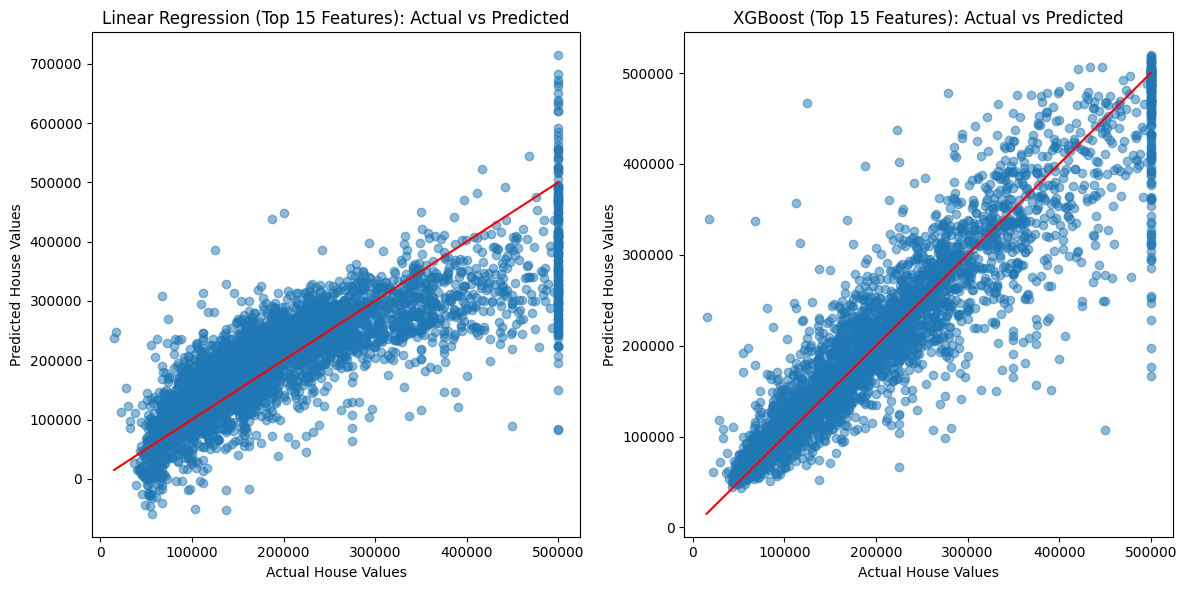

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Step 1: Extracting Top 15 Features Based on Importance

# 1. Train Linear Regression Model to get feature importance (coefficients)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_importances = np.abs(lr_model.coef_)  # Absolute value of coefficients
lr_indices = np.argsort(lr_importances)[::-1][:15]  # Top 15 features for Linear Regression
top_15_features_lr = X_train.columns[lr_indices]

# 2. Train XGBoost Model to get feature importance
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1][:15]  # Top 15 features for XGBoost
top_15_features_xgb = X_train.columns[xgb_indices]

# Step 2: Train-Test Split with Top 15 Features

X_train_lr = X_train[top_15_features_lr]
X_test_lr = X_test[top_15_features_lr]
X_train_xgb = X_train[top_15_features_xgb]
X_test_xgb = X_test[top_15_features_xgb]

# Now re-train the Linear Regression model on the top 15 selected features
lr_model_top_15 = LinearRegression()
lr_model_top_15.fit(X_train_lr, y_train) 

# Step 3: Grid Search for XGBoost with Top 15 Features

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train_xgb, y_train)

# Best XGBoost model after grid search
best_xgb_model = grid_search.best_estimator_

# Step 4: Predictions and Evaluation with Top 15 Features

# Linear Regression with top 15 features
y_pred_lr = lr_model_top_15.predict(X_test_lr)

# XGBoost with top 15 features
y_pred_xgb = best_xgb_model.predict(X_test_xgb)

# Evaluation Metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Evaluation Metrics for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Print the results for both models
print(f"Linear Regression (Top 15 Features) - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}, RMSE: {rmse_lr}")
print(f"XGBoost (Top 15 Features) - MSE: {mse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}, RMSE: {rmse_xgb}")

# Step 5: Plot the actual vs predicted values for both models
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect fit line
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Linear Regression (Top 15 Features): Actual vs Predicted')

# XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect fit line
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('XGBoost (Top 15 Features): Actual vs Predicted')

plt.tight_layout()
plt.show()


## Explanation and interpretation of results

The scatter plots above show the relationship between the actual house prices (x-axis) and the predicted house prices (y-axis) for both Linear Regression (left) and XGBoost (right), using the top 15 features from each model.

### Linear Regression (Left Plot):

- Spread of Points: The points deviate more from the perfect prediction line (red line) compared to XGBoost. This suggests that Linear Regression struggles to make accurate predictions, particularly for higher house values.
- Higher Errors for High-Value Houses: There is a noticeable spread and clustering at the upper end of house prices (around $500,000), where predictions are consistently underestimating actual values. This indicates that Linear Regression is not capturing complex patterns in the data, especially for high-priced properties.

### XGBoost (Right Plot):

- Closer Fit to Perfect Line: The points are more closely aligned with the red line, especially for middle and high-value houses. This suggests that XGBoost is making more accurate predictions and better modeling the relationships in the dataset.
- Lower Spread for Higher Values: Unlike Linear Regression, XGBoost performs better at predicting higher house prices, with fewer extreme deviations from the actual values. This shows that XGBoost can handle the non-linear relationships between features and target values more effectively.

## Reflection of Results

### Model Performances:

- Linear Regression shows significant variance, especially for high-value houses, with frequent under-predictions. Its assumption of a linear relationship limits its ability to model the complexity in house pricing data.
- XGBoost performs much better, with predictions more closely clustered around the actual values. The lower error rate and better fit to the perfect prediction line highlight its ability to model non-linear relationships.

### Error Distribution:

- Linear Regression has a wider distribution of errors, indicating higher overall variance and error in predictions, particularly for homes with higher values. This is a sign of its bias and inability to capture interactions between features.
- XGBoost shows a more uniform error distribution, with fewer outliers and smaller prediction errors, reflecting its ability to generalize well and handle outliers better.

## Conclusion

XGBoost clearly outperforms Linear Regression in terms of predictive accuracy, especially for higher-priced homes. Its ability to capture non-linear relationships and interactions between features results in significantly better performance across all metrics (MSE, MAE, R², RMSE) and visually in the scatter plot.

Linear Regression, while interpretable and fast, shows limitations due to its linear nature. It fails to capture the complexities of the data, leading to poor performance, particularly for higher house prices.

XGBoost is the recommended model for predicting house prices, as it offers greater accuracy and generalization. However, if interpretability is important, Linear Regression might still be considered for smaller, more explainable datasets but at the cost of performance.

## Experimentation with Sampling

### Stratified Sampling

In [22]:
# Create bins for stratified sampling (e.g., binning house prices into quantiles)
bins = np.quantile(df_encoded['house_value'], q=[0, 0.25, 0.5, 0.75, 1])
df_encoded['price_bin'] = pd.cut(df_encoded['house_value'], bins=bins, labels=False, include_lowest=True)

# Stratified train-test split based on the binned house prices
X = df_encoded.drop(['house_value', 'price_bin'], axis=1)
y = df_encoded['house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df_encoded['price_bin'], random_state=42)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.5s

[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END

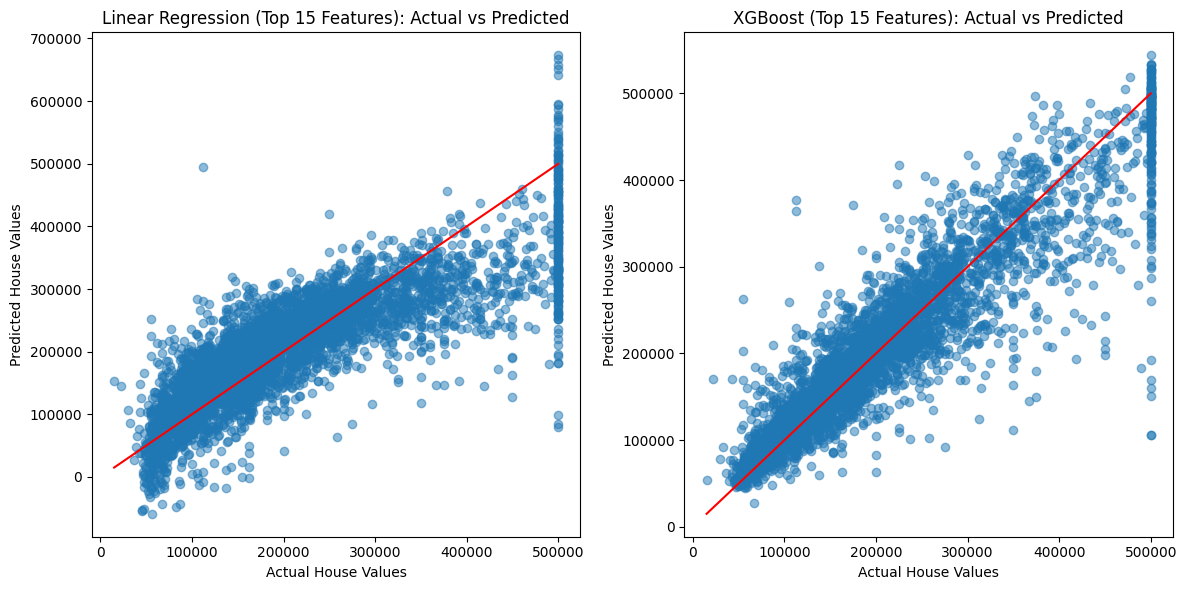

In [23]:
# Step 1: Extracting Top 15 Features Based on Importance

# 1. Train Linear Regression Model to get feature importance (coefficients)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_importances = np.abs(lr_model.coef_)  # Absolute value of coefficients
lr_indices = np.argsort(lr_importances)[::-1][:15]  # Top 15 features for Linear Regression
top_15_features_lr = X_train.columns[lr_indices]

# 2. Train XGBoost Model to get feature importance
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1][:15]  # Top 15 features for XGBoost
top_15_features_xgb = X_train.columns[xgb_indices]

# Step 2: Train-Test Split with Top 15 Features

X_train_lr = X_train[top_15_features_lr]
X_test_lr = X_test[top_15_features_lr]
X_train_xgb = X_train[top_15_features_xgb]
X_test_xgb = X_test[top_15_features_xgb]

# Now re-train the Linear Regression model on the top 15 selected features
lr_model_top_15 = LinearRegression()
lr_model_top_15.fit(X_train_lr, y_train) 

# Step 3: Grid Search for XGBoost with Top 15 Features

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train_xgb, y_train)

# Best XGBoost model after grid search
best_xgb_model = grid_search.best_estimator_

# Step 4: Predictions and Evaluation with Top 15 Features

# Linear Regression with top 15 features
y_pred_lr = lr_model_top_15.predict(X_test_lr)

# XGBoost with top 15 features
y_pred_xgb = best_xgb_model.predict(X_test_xgb)

# Evaluation Metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Evaluation Metrics for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Print the results for both models
print(f"Linear Regression (Top 15 Features) - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}, RMSE: {rmse_lr}")
print(f"XGBoost (Top 15 Features) - MSE: {mse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}, RMSE: {rmse_xgb}")

# Step 5: Plot the actual vs predicted values for both models
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect fit line
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Linear Regression (Top 15 Features): Actual vs Predicted')

# XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect fit line
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('XGBoost (Top 15 Features): Actual vs Predicted')

plt.tight_layout()
plt.show()

### SMOTE (Synthetic Minority Over-sampling Technique)

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import KBinsDiscretizer

# Discretize house prices into bins to apply SMOTE
binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
y_binned = binner.fit_transform(y.values.reshape(-1, 1)).ravel()

# Apply SMOTE to the binned target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled_binned = smote.fit_resample(X, y_binned)

# Inverse transform the binned target to original prices
y_resampled = binner.inverse_transform(y_resampled_binned.reshape(-1, 1)).ravel()

X_train = X_resampled
y_train = y_resampled


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END

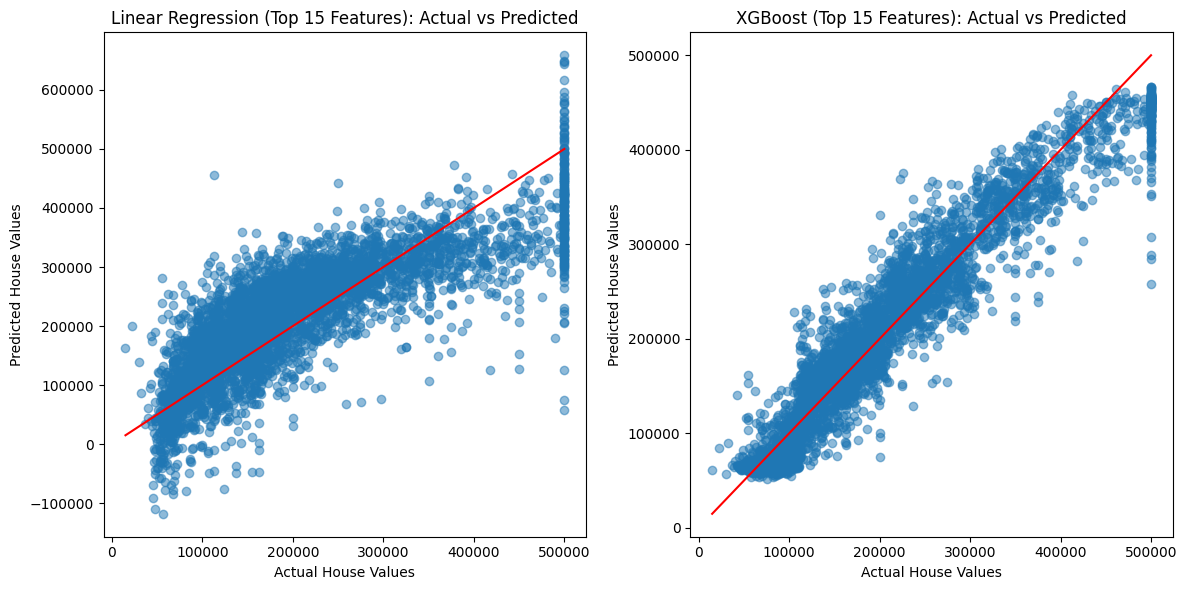

In [25]:
# Step 1: Extracting Top 15 Features Based on Importance

# 1. Train Linear Regression Model to get feature importance (coefficients)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_importances = np.abs(lr_model.coef_)  # Absolute value of coefficients
lr_indices = np.argsort(lr_importances)[::-1][:15]  # Top 15 features for Linear Regression
top_15_features_lr = X_train.columns[lr_indices]

# 2. Train XGBoost Model to get feature importance
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1][:15]  # Top 15 features for XGBoost
top_15_features_xgb = X_train.columns[xgb_indices]

# Step 2: Train-Test Split with Top 15 Features

X_train_lr = X_train[top_15_features_lr]
X_test_lr = X_test[top_15_features_lr]
X_train_xgb = X_train[top_15_features_xgb]
X_test_xgb = X_test[top_15_features_xgb]

# Now re-train the Linear Regression model on the top 15 selected features
lr_model_top_15 = LinearRegression()
lr_model_top_15.fit(X_train_lr, y_train) 

# Step 3: Grid Search for XGBoost with Top 15 Features

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train_xgb, y_train)

# Best XGBoost model after grid search
best_xgb_model = grid_search.best_estimator_

# Step 4: Predictions and Evaluation with Top 15 Features

# Linear Regression with top 15 features
y_pred_lr = lr_model_top_15.predict(X_test_lr)

# XGBoost with top 15 features
y_pred_xgb = best_xgb_model.predict(X_test_xgb)

# Evaluation Metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Evaluation Metrics for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Print the results for both models
print(f"Linear Regression (Top 15 Features) - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}, RMSE: {rmse_lr}")
print(f"XGBoost (Top 15 Features) - MSE: {mse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}, RMSE: {rmse_xgb}")

# Step 5: Plot the actual vs predicted values for both models
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect fit line
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Linear Regression (Top 15 Features): Actual vs Predicted')

# XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect fit line
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('XGBoost (Top 15 Features): Actual vs Predicted')

plt.tight_layout()
plt.show()

# Random Under-sampling 

In [26]:
from imblearn.under_sampling import RandomUnderSampler

# Random under-sampling to balance the dataset
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

X_train = X_resampled
y_train = y_resampled


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.4s
[CV] END

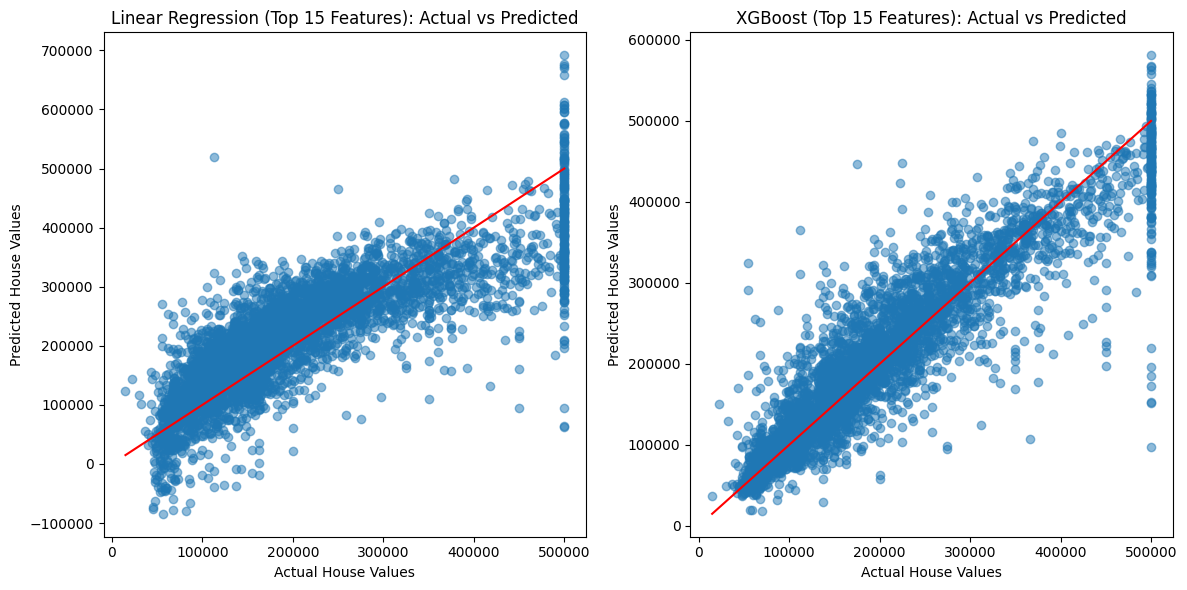

In [27]:
# Step 1: Extracting Top 15 Features Based on Importance

# 1. Train Linear Regression Model to get feature importance (coefficients)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_importances = np.abs(lr_model.coef_)  # Absolute value of coefficients
lr_indices = np.argsort(lr_importances)[::-1][:15]  # Top 15 features for Linear Regression
top_15_features_lr = X_train.columns[lr_indices]

# 2. Train XGBoost Model to get feature importance
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1][:15]  # Top 15 features for XGBoost
top_15_features_xgb = X_train.columns[xgb_indices]

# Step 2: Train-Test Split with Top 15 Features

X_train_lr = X_train[top_15_features_lr]
X_test_lr = X_test[top_15_features_lr]
X_train_xgb = X_train[top_15_features_xgb]
X_test_xgb = X_test[top_15_features_xgb]

# Now re-train the Linear Regression model on the top 15 selected features
lr_model_top_15 = LinearRegression()
lr_model_top_15.fit(X_train_lr, y_train) 

# Step 3: Grid Search for XGBoost with Top 15 Features

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train_xgb, y_train)

# Best XGBoost model after grid search
best_xgb_model = grid_search.best_estimator_

# Step 4: Predictions and Evaluation with Top 15 Features

# Linear Regression with top 15 features
y_pred_lr = lr_model_top_15.predict(X_test_lr)

# XGBoost with top 15 features
y_pred_xgb = best_xgb_model.predict(X_test_xgb)

# Evaluation Metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Evaluation Metrics for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Print the results for both models
print(f"Linear Regression (Top 15 Features) - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}, RMSE: {rmse_lr}")
print(f"XGBoost (Top 15 Features) - MSE: {mse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}, RMSE: {rmse_xgb}")

# Step 5: Plot the actual vs predicted values for both models
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect fit line
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Linear Regression (Top 15 Features): Actual vs Predicted')

# XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect fit line
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('XGBoost (Top 15 Features): Actual vs Predicted')

plt.tight_layout()
plt.show()

### Sampling and Smoothing Techniques

In our project, we explored multiple techniques for addressing the imbalances in our dataset, particularly for the house price prediction problem. The goal was to handle the over-representation of certain house price ranges, such as around the \$500k mark, which were influencing the performance of the regression model. Here’s a summary of the techniques we applied:

#### 1. **Stratified Sampling**
We initially tried **stratified sampling** to ensure that each bin of house prices was proportionately represented in the training set. However, this method did not provide the desired balance. The issue persisted as the dataset still skewed heavily towards the middle range of house prices, especially around \$500k, and the model continued to perform poorly on higher and lower price ranges.

#### 2. **SMOTE (Synthetic Minority Over-sampling Technique)**
We applied **SMOTE**, commonly used for classification problems, to generate synthetic data for under-represented price ranges. This method artificially increased the number of instances in the price bins where data was sparse. While SMOTE helped balance the dataset to some extent, it led to an excessive amount of data in the middle price range, particularly around \$500k. As a result, the regression model struggled to predict values at the upper and lower extremes accurately.

#### 3. **Random Under-sampling**
In another approach, we applied **random under-sampling** to remove instances around the \$500k price range. While this did reduce the over-representation of those prices, it significantly reduced the size of the dataset, leading to a less effective model with limited data to learn from. The performance of the regression model still suffered from poor predictions in the \$500k range, indicating that removing too much data was not the right solution.

---

### Conclusion

None of the sampling techniques—whether **stratified sampling**, **SMOTE**, or **random under-sampling**—provided an adequate solution. Either the dataset became too small to build a robust model, or the \$500k house prices still dominated, negatively impacting the regression model's predictions for that range. 

### Future Work

Moving forward, we recommend the following approaches to address these challenges:

1. **Feature Engineering**: Consider incorporating additional features (e.g., economic indicators, neighborhood-specific data) that might explain the variation in house prices more effectively, particularly for higher-end properties.
   
2. **Quantile Regression**: Explore the use of **quantile regression**, which allows the model to estimate the conditional median or other quantiles instead of just the mean. This might help in addressing the skew in the data.
   
3. **Custom Binning for Price Ranges**: Instead of relying on arbitrary bin sizes, creating custom bins based on price distribution patterns could lead to a more even representation of price categories.

4. **Advanced Resampling Techniques**: Investigate more advanced resampling techniques, like **ADASYN** or **SMOTENC**, which may better account for continuous variables and improve model generalization across the price spectrum.

By implementing these strategies, we hope to build a more balanced and effective model for house price predictions.
